<a href="https://colab.research.google.com/github/sathish0416/Principle_Component_Analysis/blob/main/PCA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Baseline Model - Accuracy: 0.9814814814814815, Precision: 0.982716049382716, Recall: 0.9814814814814815
PCA Model with 2 components - Accuracy: 0.9629629629629629
PCA Model with 5 components - Accuracy: 0.9814814814814815
PCA Model with 10 components - Accuracy: 0.9814814814814815


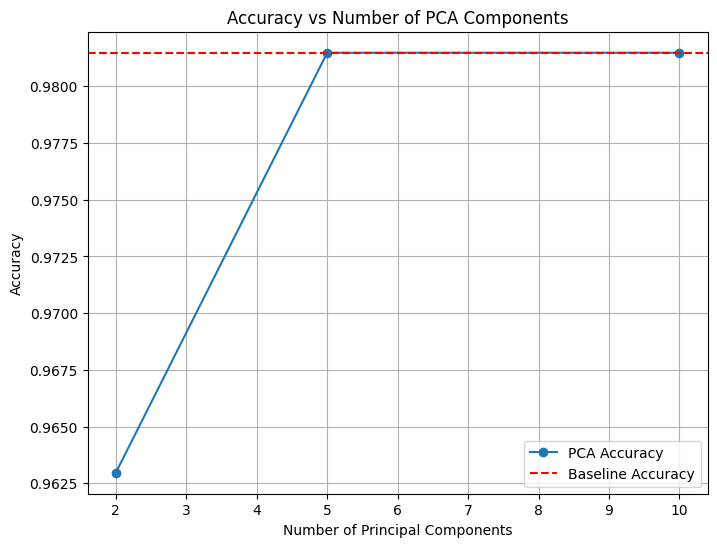

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

wine = load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

baseline_model = LogisticRegression(max_iter=10000)
baseline_model.fit(X_train_std, y_train)
y_pred_baseline = baseline_model.predict(X_test_std)

accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
precision_baseline = precision_score(y_test, y_pred_baseline, average='weighted')
recall_baseline = recall_score(y_test, y_pred_baseline, average='weighted')

print(f"Baseline Model - Accuracy: {accuracy_baseline}, Precision: {precision_baseline}, Recall: {recall_baseline}")

components_list = [2, 5, 10]
accuracy_scores = []

for n_components in components_list:

    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_std)
    X_test_pca = pca.transform(X_test_std)

    pca_model = LogisticRegression(max_iter=10000)
    pca_model.fit(X_train_pca, y_train)

    y_pred_pca = pca_model.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    accuracy_scores.append(accuracy_pca)

    print(f"PCA Model with {n_components} components - Accuracy: {accuracy_pca}")

plt.figure(figsize=(8,6))
plt.plot(components_list, accuracy_scores, marker='o', label='PCA Accuracy')
plt.axhline(y=accuracy_baseline, color='r', linestyle='--', label='Baseline Accuracy')
plt.title('Accuracy vs Number of PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
